Aluno: Felipe Miranda Cardoso de Sá
<br> Matrícula: 201802677
<br> PDI - Processamento Digital de Imagens
<br> Professor: Cassio Denner

Criar um Jupyter Notebook, uma “m-file”, etc, que funcione para a imagem da Figura 4.41 do
Gonzalez (pág. 177). Faça um relatório simples, abordando os itens:
a) Visualize e mostre a imagem original e a imagem no domínio da frequência (Espectro de
Fourier). Veja o Notebook da aula anterior ou o código Matlab;

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
img = cv2.imread("/content/drive/MyDrive/HistogramasPDI/imagens/Fig0441(a)(characters_test_pattern).tif", cv2.IMREAD_GRAYSCALE)

Imagem Original 4.41

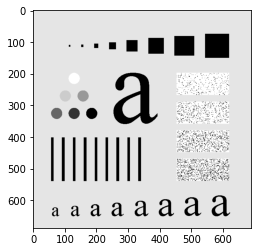

In [63]:
plt.figure(0)
plt.imshow(img, cmap='gray')

In [64]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

Imagem 4.41 no espectro de frequências

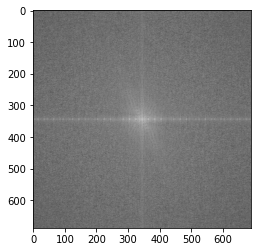

In [65]:
plt.figure()
plt.imshow(magnitude_spectrum, cmap='gray')

In [66]:
def low_pass_filter(img, r = 50):

  W, L = img.shape
  ham = np.hamming(W)[:,None]              #função hamming 
  ham2d = np.sqrt(np.dot(ham, ham.T)) ** r   #uso do parametro R para definir a abrangência do filtro

  f = cv2.dft(img.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)  #Transformada discreta de Fourrier
  f_shifted = np.fft.fftshift(f)                                    #deslocamento 
  f_complex = f_shifted[:,:,0]*1j + f_shifted[:,:,1]
  f_filtered = ham2d * f_complex                                  #aplicando o filtro complexo 
                                                                  #Convolution between the Fourier Transformed
  f_filtered_shifted = np.fft.fftshift(f_filtered)
  inv_img = np.fft.ifft2(f_filtered_shifted)            #ifft2 (2D inverse fast fourier transform)  
  filtered_img = np.abs(inv_img)
  filtered_img -= filtered_img.min()
  filtered_img = filtered_img*255 / filtered_img.max()
  filtered_img = filtered_img.astype(np.uint8)

  return filtered_img

Deslocamento na função passa baixa: <br>

---


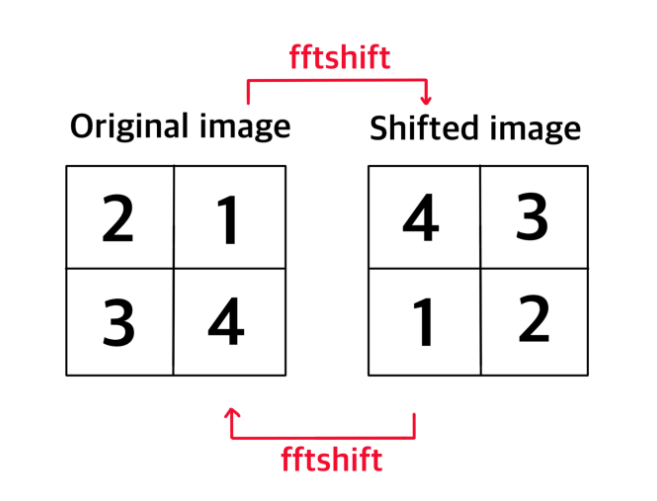

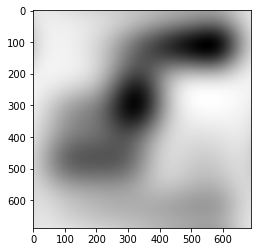

In [67]:
fill_img = low_pass_filter(img, 15000)

plt.figure(0)
plt.imshow(fill_img, cmap='gray')

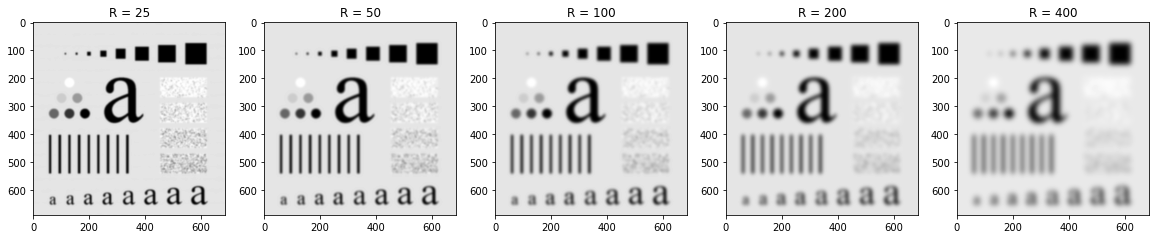

In [68]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20,5))

ax1.set_title('R = 25')
ax2.set_title('R = 50')
ax3.set_title('R = 100')
ax4.set_title('R = 200')
ax5.set_title('R = 400')

ax1.imshow(low_pass_filter(img, 25), cmap='gray');
ax2.imshow(low_pass_filter(img, 50), cmap='gray');
ax3.imshow(low_pass_filter(img, 100), cmap='gray');
ax4.imshow(low_pass_filter(img, 200), cmap='gray');
ax5.imshow(low_pass_filter(img, 400), cmap='gray');